In [40]:
import pandas as pd
import json

df = pd.read_csv("data/0721-month-analysis-data.csv")
analyzed_homepages = pd.read_json("homepage_data_analyzed.json", encoding='utf-8')


In [41]:
standard_columns = ['general_analysis', 'cross_group_thinking_ideas',
       'cross_group_thinking_score', 'unifying_language_ideas',
       'unifying_language_score', 'shared_initiatives_outreach_ideas',
       'shared_initiatives_outreach_score', 'importance_of_career_standing_ideas', 'importance_of_career_standing_score', 
       'hong_kong_emphasis_ideas', 'hong_kong_emphasis_score', 'highlighting_china_organization_ideas',
       'highlighting_china_organization_score', 'name']
analyzed_homepages = analyzed_homepages[standard_columns]

In [42]:
analyzed_homepages.columns

Index(['general_analysis', 'cross_group_thinking_ideas',
       'cross_group_thinking_score', 'unifying_language_ideas',
       'unifying_language_score', 'shared_initiatives_outreach_ideas',
       'shared_initiatives_outreach_score',
       'importance_of_career_standing_ideas',
       'importance_of_career_standing_score', 'hong_kong_emphasis_ideas',
       'hong_kong_emphasis_score', 'highlighting_china_organization_ideas',
       'highlighting_china_organization_score', 'name'],
      dtype='object')

In [43]:
score_columns =  ['cross_group_thinking_score', 'unifying_language_score', 'shared_initiatives_outreach_score'] + ["importance_of_career_standing_score", "hong_kong_emphasis_score", "highlighting_china_organization_score"]
for column in score_columns:
    analyzed_homepages[column] = pd.to_numeric(analyzed_homepages[column], errors='coerce').fillna(0).astype(int)
analyzed_homepages["inverse_hong_kong_emphasis_score"] = 10 - analyzed_homepages["hong_kong_emphasis_score"]

In [44]:
pooled_scores = {
    "total_reconciliation_score": ['cross_group_thinking_score', 'unifying_language_score', 'shared_initiatives_outreach_score'],
    "total_camouflage_score": ["importance_of_career_standing_score", "inverse_hong_kong_emphasis_score", "highlighting_china_organization_score"]
}

for key, columns_to_convert in pooled_scores.items():
    analyzed_homepages[key] = analyzed_homepages[columns_to_convert].mean(axis=1)

In [ ]:
merged_df = pd.merge(df, analyzed_homepages, left_on='Researcher Cleaned Name', right_on='name', how='left')
# merged_df.fillna(0, inplace=True)
merged_df.drop(columns=['name'], inplace=True)

print(merged_df['Pre-2014 Region'].value_counts())

merged_df.to_csv("data/0721-month-analysis-data-merged-5.csv", index=False)

Pre-2014 Region
Hong Kong    21848
Singapore    15125
Name: count, dtype: int64


In [49]:
merged_df.columns

Index(['Researcher Cleaned Name', 'year', 'month', 'num_sg_mean',
       'num_sg_error', 'num_hk_mean', 'num_hk_error', 'num_ml_mean',
       'num_ml_error', 'num_other_mean', 'num_other_error', 'teamsize_mean',
       'teamsize_error', 'prop_sg_mean', 'prop_sg_error', 'prop_hk_mean',
       'prop_hk_error', 'prop_ml_mean', 'prop_ml_error', 'prop_other_mean',
       'prop_other_error', 'total_citations_mean', 'total_citations_error',
       'Name', 'Researcher Classification', 'Left after 2014', 'PhD Location',
       'Master Location', 'Bachelor Location', 'Leaving Region', 'Join Year',
       'Join Month', 'PhD Year', 'Master Year', 'Bachelor Year', 'Department',
       'Title', 'First Year', 'Leaving Year', 'Leaving Month', 'Academic Age',
       'Pre-2014 School', 'Post Event', 'Pre-2014 Region',
       'Number of Publications', 'general_analysis',
       'cross_group_thinking_ideas', 'cross_group_thinking_score',
       'unifying_language_ideas', 'unifying_language_score',
       

In [50]:
data = json.load(open("homepage_data_analyzed.json"))
for researcher in data:
    print(researcher["unifying_language_ideas"])

Unifying language would include terms like 'joint research', 'collaborative efforts', or 'international partnerships' and would point to the faculty's intent to engage with a broader scientific community.
There is no explicit language that suggests unifying different groups or fostering collaboration across contentious boundaries. The language used is neutral and focused on academic content.
Analyzing the language used, note whether there are any expressions or terminologies that emphasize unity, such as 'global collaboration,' 'international partnerships,' or 'cross-regional initiatives.'
The language used is technical and focused on the academic and technical aspects of the faculty member’s work. There is little explicit unifying language that emphasizes collaboration or bridging divides. However, the variety in research topics can implicitly suggest cooperation across different fields or schools of thought.
While the profile emphasizes professional achievements and collaborations, i

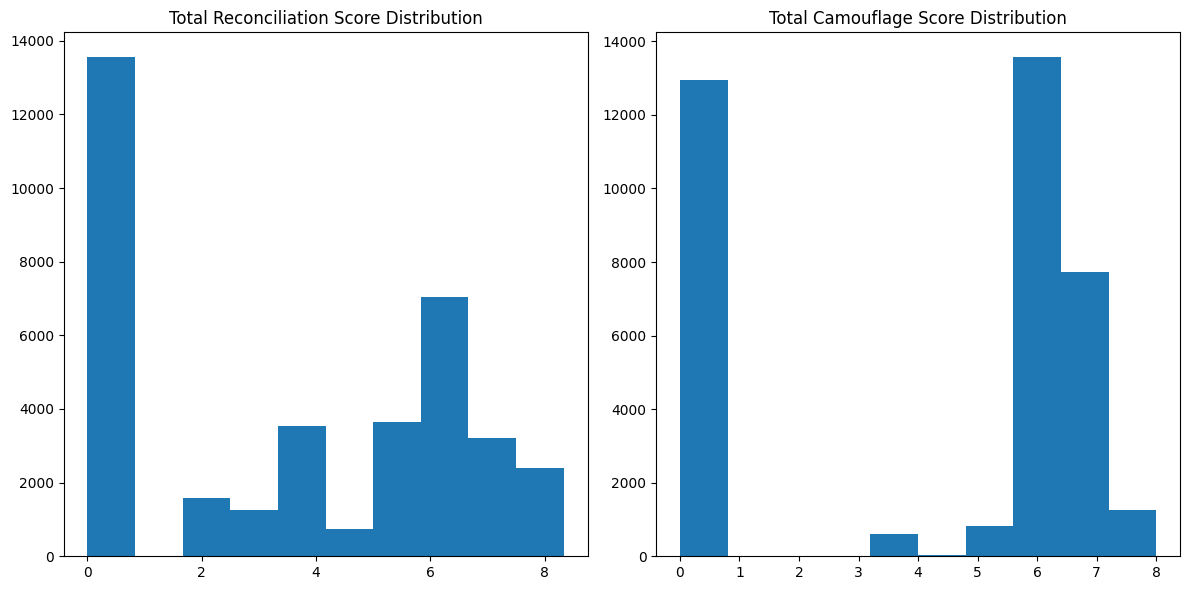

In [51]:
import matplotlib.pyplot as plt

fig, axs = plt.subplots(1, 2, figsize=(12, 6))

axs[0].hist(merged_df['total_reconciliation_score'])
axs[0].set_title("Total Reconciliation Score Distribution")

axs[1].hist(merged_df['total_camouflage_score'])
axs[1].set_title("Total Camouflage Score Distribution")

plt.tight_layout()
plt.show()